<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 2.2.1

# Data

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

> One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this lab, we'll explore this dataset to find insight.

[Titanic Dataset](https://www.kaggle.com/c/titanic/data)

# Data Dictionary

| Variable |                                 Definition | Key                                            |
|----------|-------------------------------------------:|------------------------------------------------|
| Survival | Survival                                   | 0 = No, 1 = Yes                                |
| Pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| Sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| SibSp    | # of siblings / spouses aboard the Titanic |                                                |
| Parch    | # of parents / children aboard the Titanic |                                                |
| Ticket   | Ticket number                              |                                                |
| Fare     | Passenger fare                             |                                                |
| Cabin    | Cabin number                               |                                                |
| Embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

# Loading Modules

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

# Loading Dataset

Read titanic dataset.

In [2]:
# Read Titanic Dataset
titanic_csv = '../DATA/titanic_train.csv'
titanic = pd.read_csv(titanic_csv)

# Explore Dataset

## Head

In [3]:
# Check Head
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Tail

In [4]:
# Check Tail
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Shape

Find shape of dataset.

In [5]:
# ANSWER
titanic.shape

(891, 12)

## Check Types of Data

Check types of data you have

In [6]:
# ANSWER
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Check Null Values

Check whether dataset have any null values.

In [36]:
# ANSWER
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
# Check titanic data again (why?)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Fill Null Values

Is there any null values in any columns?

- Identify those columns
- Fill those null values using your own logic
    - ❓**Fill with what??**
    - State your logic behind every step

### Age

In [38]:
# ANSWER
titanic.Age.isnull().any() #returns True
# titanic.Age.fillna(titanic.Age.mean(), inplace=True) #FutureWarning that inplace will not work this way in Pandas 3.0
titanic["Age"] = titanic["Age"].fillna(titanic["Age"].mean())


'''
This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing
    df[col].method(value, inplace=True)

try using
    df.method({col: value}, inplace=True)

or
    df[col] = df[col].method(value)
instead, to perform the operation inplace on the original object.


'''

'\nThis inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.\n\nFor example, when doing\n    df[col].method(value, inplace=True)\n\ntry using\n    df.method({col: value}, inplace=True)\n\nor\n    df[col] = df[col].method(value)\ninstead, to perform the operation inplace on the original object.\n\n\n'

### Cabin

In [39]:
# ANSWER
titanic.Cabin.isnull().any()
titanic["Cabin"] = titanic["Cabin"].fillna('')

### Embarked

In [40]:
# ANSWER
titanic.Embarked.isnull().any()
titanic["Embarked"] = titanic["Embarked"].fillna('')

# Describe

Describe your dataset.

In [41]:
# ANSWER
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Relationship between Features and Survival

Find relationship between categorical features and survived.

**Describe your findings.**

In [14]:
def bar_charts(df, feature):
    '''
    Inputs:
    df: Dataset
    feature: Name of Feature to Check With Survived
    '''
    _agg = {
        'PassengerId': 'count'
    }
    _groupby = ['Survived', feature]

    df_feature = df.groupby(by=_groupby).agg(_agg)

    ax = df_feature.unstack().plot(kind='bar', figsize=(15,6))
    plt.legend(list(df_feature.index.levels[1].unique()))
    plt.xlabel('Survived')
    plt.xticks(np.arange(2), ('No', 'Yes'))
    plt.show();

## Pclass

Use the `bar_charts` function above to view the relationship between survived and pclass.  Note your findings.

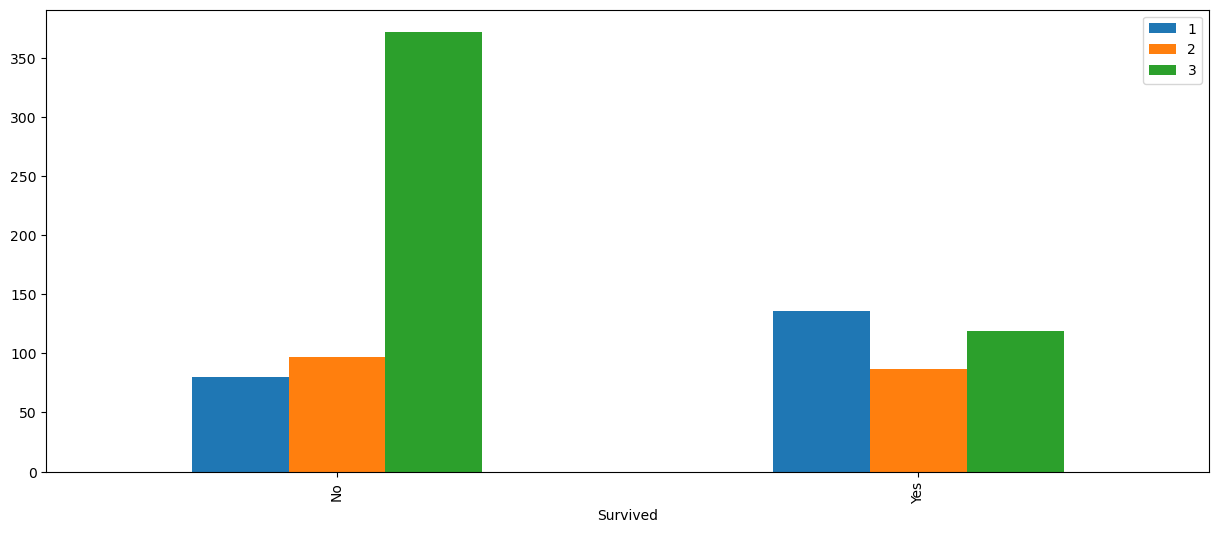

In [15]:
# ANSWER
bar_charts(titanic, "Pclass")

- More first-class-ticket passengers survived than didn't.
- Survival rate among second-class-ticket passengers was about half and half (slightly less than half survived/slightly more than half did not survive)
- **Most third-class-ticket passengers did not survive.**

## Sex

Use `bar_charts` to view the relationship between survived and sex.  Note your findings.

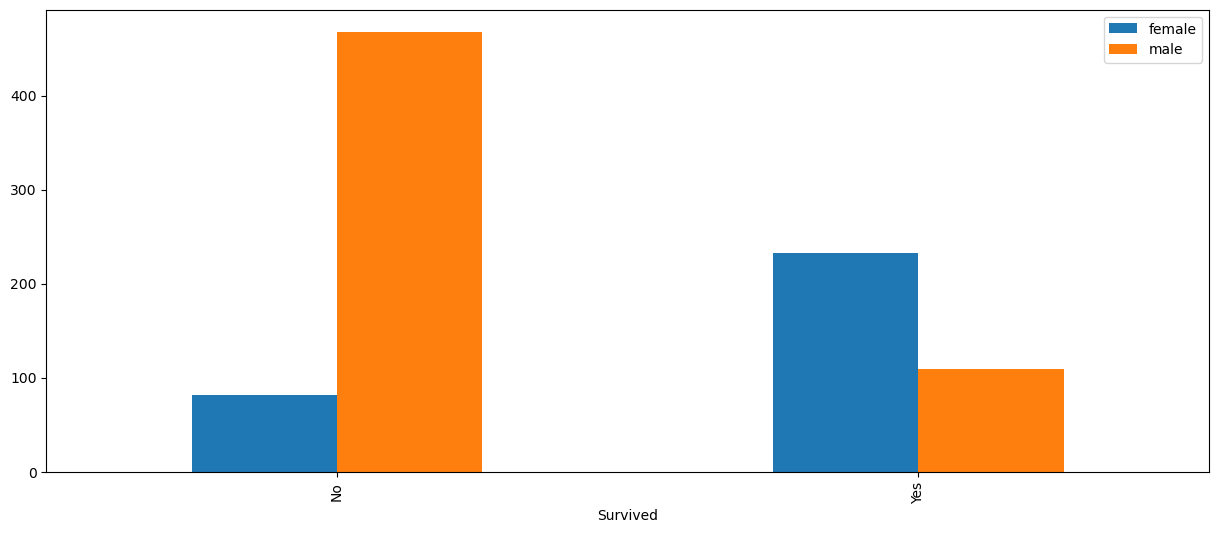

In [16]:
# ANSWER
bar_charts(titanic, "Sex")

- More women survived than didn't
- **Most of the men did not survive**


## Parch

Parch = Number of parents and children travelling with each passenger. Use `bar_charts` to view the relationship between survived and Parch.

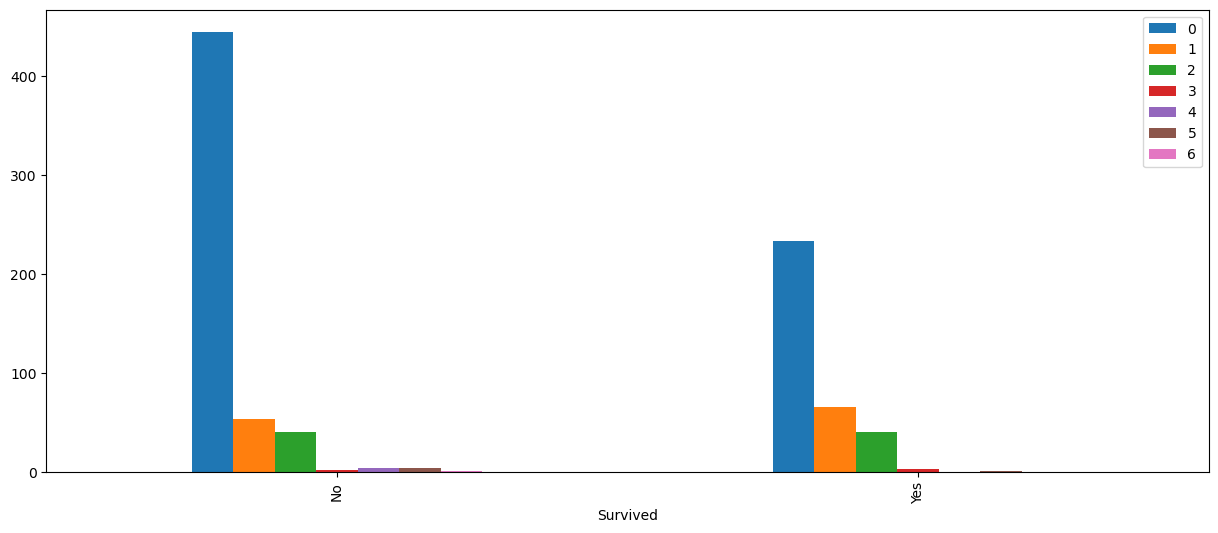

In [17]:
# ANSWER
bar_charts(titanic, "Parch")

About 40% of parent-child group passengers traveling without parent/child family members survived.  Passengers traveling with parents and/or children, about half survived.

## SibSp

SibSp = Number of siblings and spouses travelling with each passenger. Use `bar_charts` to view the relationship between survived and SibSp.

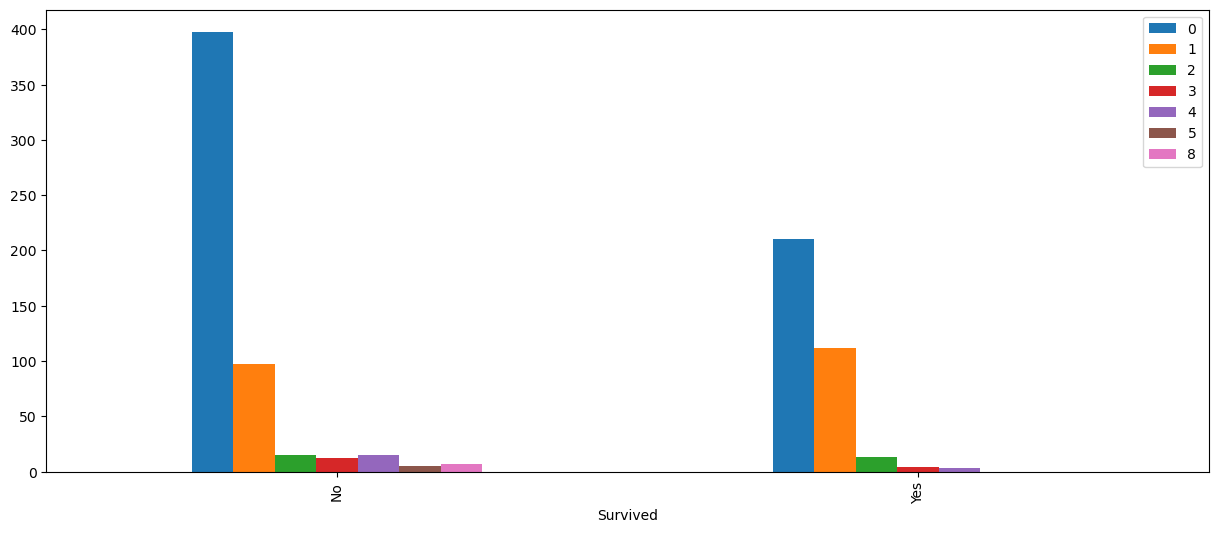

In [18]:
# ANSWER
bar_charts(titanic, "SibSp")


## Embarked

Do the same for the Embarked variable.

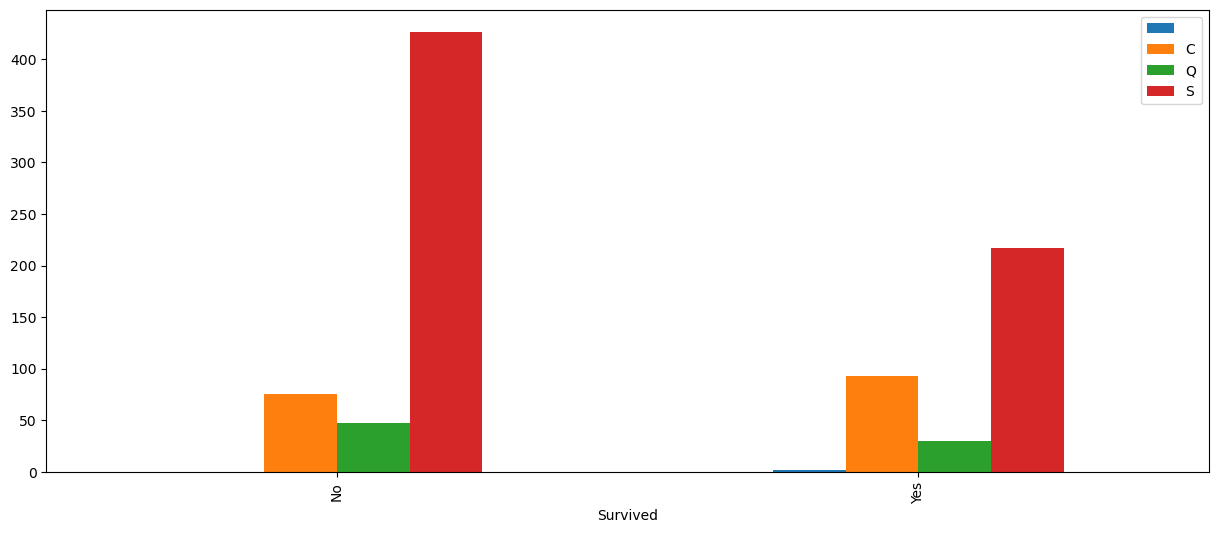

In [42]:
# ANSWER
bar_charts(titanic, "Embarked")

C = Cherbourg, Q = Queenstown, S = Southampton 

For passengers who embarked in Cherbourg or Queenstown, survival was about 50/50. But about 2/3 of passengers who embarked at Southampton did not survive.

# Feature Engineering

We shall create some new features from the existing features.

## Fare Class

Create a new column 'Fare class' based on their fare as defined below. Is there any relationship between fare and survival?

In [21]:
def create_fare_class(x):
    if x > 30:
        fare_class = 1
    elif x > 20 and x <= 30:
        fare_class = 2
    elif x > 10 and x <= 20:
        fare_class = 3
    else:
        fare_class = 4
    return fare_class

In [ ]:
# ANSWER
titanic["Fare_Class"] = titanic.Fare.apply(create_fare_class)

## Age Class

Similarly, create a new column 'Age class' based on their age as defined below.

In [43]:
def create_age_class(x):
    if x > 60:
        age_class = 5
    elif x > 35 and x <= 60:
        age_class = 4
    elif x > 25 and x <= 35:
        age_class = 3
    elif x > 16 and x <= 25:
        age_class = 2
    else:
        age_class = 1
    return age_class

In [ ]:
# ANSWER
titanic["Age_Class"] = titanic.Age.apply(create_age_class)

## Sex class

(my own - Pandas could not handle the sex strings)

In [56]:
print(f"null count:{titanic.Sex.isnull().sum()}")
titanic.Sex.unique()

null count:0


array(['male', 'female'], dtype=object)

In [57]:
def sex_class(sex):
    return 1 if sex=="female" else 0

titanic["Sex_Class"] = titanic["Sex"].apply(sex_class)

In [58]:
titanic.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Class,Fare_Class,Sex_Class
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,29.699118,0,0,PC 17585,79.20,,C,3,1,1
587,588,1,1,"Frolicher-Stehli, Mr. Maxmillian",male,60.000000,1,1,13567,79.20,B41,C,4,1,0
855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.000000,0,1,392091,9.35,,S,2,4,1
427,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.000000,0,0,250655,26.00,,S,2,2,1
660,661,1,1,"Frauenthal, Dr. Henry William",male,50.000000,2,0,PC 17611,133.65,,S,4,1,0


# Statistical Overview

## Correlation

Find correlation between `survived` and other features.

In [62]:
# ANSWER
titanic.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_Class,Fare_Class,Sex_Class
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658,0.026653,0.003258,-0.042939
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.067911,-0.307600,0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,-0.292128,0.719670,-0.131900
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.933632,-0.108947,-0.084153
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.232166,-0.380692,0.114631
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.168121,-0.387100,0.245489
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,0.075551,-0.599129,0.182333
Age_Class,0.026653,-0.067911,-0.292128,0.933632,-0.232166,-0.168121,0.075551,1.000000,-0.080506,-0.090941
Fare_Class,0.003258,-0.307600,0.719670,-0.108947,-0.380692,-0.387100,-0.599129,-0.080506,1.000000,-0.239309
Sex_Class,-0.042939,0.543351,-0.131900,-0.084153,0.114631,0.245489,0.182333,-0.090941,-0.239309,1.000000


# [BONUS] Hypothesis Testing
---
The usual process of null hypothesis testing consists of four steps.

1. Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

2. Identify a test statistic that can be used to assess the truth of the null hypothesis.

3. Compute the p-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the p-value, the stronger the evidence against the null hypothesis.

4. Compare the p-value to an acceptable significance value alpha (sometimes called an alpha value). If p<=alpha, that the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

### Define Hypothesis

> Formulate the null hypothesis H_0 (commonly, that the observations are the result of pure chance) and the alternative hypothesis H_a (commonly, that the observations show a real effect combined with a component of chance variation).

    Null Hypothesis (H0): There is no difference in the survival rate between the young and old passengers.

    Alternative Hypothesis (HA): There is a difference in the survival rate between the young and old passengers.

### Collect Data

Next step is to collect data for each population group.

Collect two sets of data, one with passengers who survived and another one with passengers who died (call them `titanic_survived` and `titanic_died`). The sample sizes should ideally be the same but they can be different. Let's say that the sample sizes are 100.

In [64]:
N=100
# ANSWER
titanic_survived = titanic[titanic.Survived==1].sample(N)
titanic_died = titanic[titanic.Survived==0].sample(N)


In [65]:
a = titanic_survived['Age']
b = titanic_died['Age']

### Set alpha (let alpha = 0.05)


In [67]:
# ANSWER
alpha = 0.05


### Calculate test statistic

> Here we identify a test statistic that can be used to assess the truth of the null hypothesis.

In [69]:
## Calculate the variance to get the standard deviation
var_a = a.var(ddof = 1)
var_b = b.var(ddof = 1)

## Calculate the Standard Deviation
s = np.sqrt((var_a + var_b)/2)

In [70]:
## Calculate the t-statistic
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

### Find the p-value

> Next we compute the P-value, which is the probability that a test statistic at least as significant as the one observed would be obtained assuming that the null hypothesis were true. The smaller the P-value, the stronger the evidence against the null hypothesis.

Note: Add `from scipy import stats` to import statements at top

In [73]:
## Compare with the critical t-value
## Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t
if (t > 0):
    p = 2*(1 - stats.t.cdf(t, df = df))
else:
    p = 2*stats.t.cdf(t, df = df)

In [75]:
print("home-baked stats:")
print("t = " + str(t))
print("p = " + str(p))

home-baked stats:
t = -1.2822275730289958
p = 0.2012620411819103


### Interpret results

> The p-value is compared to an acceptable significance value  alpha (sometimes called an alpha value). If p<=alpha, then the observed effect is statistically significant, the null hypothesis is ruled out, and the alternative hypothesis is valid.

In [76]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
    else:
        print("We fail to reject our null hypothesis.")

In [77]:
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("factory stats:")
print("t = " + str(t2))
print("p = " + str(p2))


factory stats:
t = -1.2822275730289956
p = 0.20126204118191046


In [79]:

print('home-baked conclusion:')
print_sig(p, alpha)

print('\nfactory conclusion:')
print_sig(p2, alpha)

home-baked conclusion:
We fail to reject our null hypothesis.

factory conclusion:
We fail to reject our null hypothesis.




---



---



> > > > > > > > > © 2024 Institute of Data


---



---



